In [30]:
# This is the code for loading images from a custom dataset 
custom_dataset_path = '/ssd_scratch/cvit/aditya1/CelebAPaired/train'

from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import cv2
import numpy as np

from glob import glob

BATCH_SIZE=64

In [2]:
images = glob(custom_dataset_path + '/*.jpg')
print(len(images))

29403


In [61]:
transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ]
)

In [65]:
class CelebaDataset(Dataset):
    def __init__(self, path, transform):
        self.images = glob(path + '/*.jpg')
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        image_path = self.images[index]
        # read the image and split the data into source and target
        image = cv2.imread(image_path)
        print(image.shape)
        source, target = image[:,:256], image[:, 256:]
        return self.transform(source), self.transform(target)

In [66]:
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = CelebaDataset(custom_dataset_path, transform)
loader = DataLoader(dataset, shuffle=True, num_workers=1, batch_size=BATCH_SIZE)

In [67]:
source, target = next(iter(loader))
print(source.shape, target.shape)

(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 512, 3)
(256, 

torch.Size([64, 256, 256, 3]) torch.Size([64, 256, 256, 3])
(256, 256, 3) (256, 256, 3)


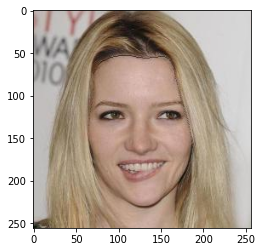

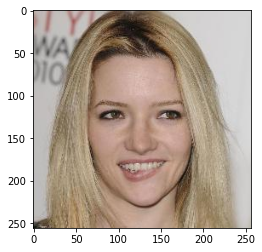

In [59]:
source, target = next(iter(loader)) # there are 64 images in the batch each of dimension 256x256 having 3 channels
print(source.shape, target.shape)
source, target = cv2.cvtColor(np.asarray(source[0].squeeze(0)), cv2.COLOR_BGR2RGB), cv2.cvtColor(np.asarray(target[0].squeeze(0)), cv2.COLOR_BGR2RGB)
print(source.shape, target.shape)

plt.figure()
plt.imshow(source)

plt.figure()
plt.imshow(target)

torch.Size([64, 256, 512, 3])
torch.Size([64, 256, 256, 3]) torch.Size([64, 256, 256, 3])
(256, 256, 3) (256, 256, 3)


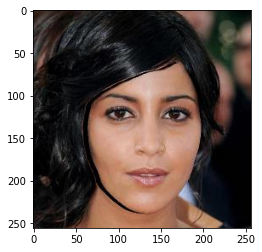

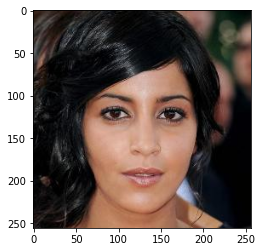

In [35]:
image = next(iter(loader))
print(image.shape)

source, target = image[:,:,:256], image[:,:,256:]
print(source.shape, target.shape)

import matplotlib.pyplot as plt 


# source_sample, target_sample = source[0].squeeze(0).permute(2, 0, 1), target[0].squeeze(0).permute(2, 0, 1)
source_sample, target_sample = np.asarray(source[0].squeeze(0)), np.asarray(target[0].squeeze(0))
# These were being loaded as torch images and they needed to be converted to np array
source_sample, target_sample = cv2.cvtColor(source_sample, cv2.COLOR_BGR2RGB), cv2.cvtColor(target_sample, cv2.COLOR_BGR2RGB)
print(source_sample.shape, target_sample.shape)

plt.figure()
plt.imshow(source_sample)

plt.figure()
plt.imshow(target_sample)